# **ATIVIDADE Projeto 3 **
### M12- Fundamentos da Descoberta de Dados

Nesse projeto trabalharemos com a base de dados de produtos de um supermercado do Chile. A ideia é que vocês apliquem os conceitos estatísticos vistos no último módulo, mais os conceitos de visualizações de dados através de gráficos e finalizem publicando no seu github!
Os campos do nosso dataframe são:

**Title:** Nome do produto. \
**Marca:** A marca do produto.\
**Preco_Normal:** O preço em que o produto costuma ser vendido quando não há desconto.\
**Preco_Desconto:** O preço vendido após o desconto ser aplicado.\
**Preco_Anterior:** Preço em que era comercializado o produto antes do desconto aplicado.\
**Desconto:** Total de desconto aplicado.

As colunas que aparecem com valores 0 são para os produtos onde não tivemos descontos aplicados.

### **Objetivos**
#### 1 - Encontre a média e mediana dos preços por categoria de produto.
 Identifique as categorias que parecem ter um valor de média abaixo ou acima da mediana. \
#### 2 - Calcule o desvio padrão por categoria de produto. 
Qual o comportamento da média e mediana nas categorias com maior desvio? \

#### 3 - Plot um boxplot da distribuição do Preco_Normal para a categoria que você identificou que tem o maior desvio padrão. Como é a distribuição desses dados segundo o boxplot? Você identifica muitos outliers?

#### 4 - Plote um gráfico de barras onde temos a média de descontos por categoria.

#### 5 - Plote um gráfico de mapa interativo agrupando os dados por categoria, marca e trazendo a média de desconto.

In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

In [77]:
df = pd.read_csv("MODULO7_PROJETOFINAL_BASE_SUPERMERCADO.csv", delimiter=',')
#dimensão 1107x7
#valores unicos 1065

print(df.dtypes)
#df.head(25)
#df.info()

title             object
Marca             object
Preco_Normal       int64
Preco_Desconto     int64
Preco_Anterior     int64
Desconto           int64
Categoria         object
dtype: object


In [4]:
df_sort = df.sort_values(by='title', ascending=False)
df_sort.head(5)

,title,Marca,Preco_Normal,Preco_Desconto,Preco_Anterior,Desconto,Categoria
218,Ñoquis de papa 500 g,Cuisine & Co,3190,0,0,0,comidas-preparadas
219,Ñoquis Tricolor 500 g,Cuisine & Co,3190,0,0,0,comidas-preparadas
138,Ñoquis Capresse 400 g,Cuisine & Co,4190,0,0,0,comidas-preparadas
664,"Zapallo italiano un,",Frutas Y Verduras Propias,690,0,0,0,verduras
348,"Zapallo europeo un,",Frutas Y Verduras Propias,2190,0,0,0,verduras


#### Encontre a média e mediana dos preços por categoria de produto.

In [99]:
#Quantas categorias existem
n_cat=df['Categoria'].nunique() # 7 categorias
L_cat=df['Categoria'].unique()  # 

md_cat_p =df.groupby('Categoria')['Preco_Normal'].mean()
mdn_cat_p=df.groupby('Categoria')['Preco_Normal'].median()
std_cat_p=df.groupby('Categoria')['Preco_Normal'].std()

resumo_preco = pd.concat([md_cat_p, mdn_cat_p,std_cat_p], axis=1, keys=['media', 'mediana','desvio '])
resumo_preco
identificar valores de média abaixo ou acima da mediana.

,media,mediana,desvio
Categoria,,,
belleza-y-cuidado-personal,1783.556485,1569,2210.041719
comidas-preparadas,3095.043478,3290,2019.911428
congelados,2108.042553,1519,2111.539896
frutas,1724.473684,1195,1639.151114
instantaneos-y-sopas,765.491228,439,1170.232869
lacteos,2385.219239,989,3925.816164
verduras,1343.296875,1180,1012.699625


19

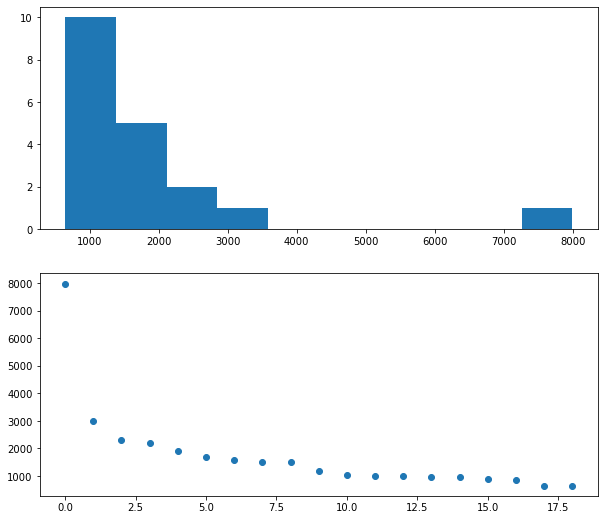

In [181]:
#listagem_de_preços_categorias
belleza_cuidado    = df[df['Categoria'] == resumo_preco.index[0]]
comidas_preparadas = df[df['Categoria'] == resumo_preco.index[1]]
congelados         = df[df['Categoria'] == resumo_preco.index[2]]
frutas             = df[df['Categoria'] == resumo_preco.index[3]]
instantaneos       = df[df['Categoria'] == resumo_preco.index[4]]
lacteos            = df[df['Categoria'] == resumo_preco.index[5]]
verduras           = df[df['Categoria'] == resumo_preco.index[6]]




(array([ 9., 23., 21.,  6.,  1.,  1.,  1.,  0.,  1.,  1.]),
 array([   0.,  585., 1170., 1755., 2340., 2925., 3510., 4095., 4680.,
        5265., 5850.]),
 <BarContainer object of 10 artists>)

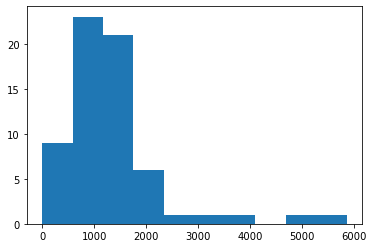

In [96]:
plt.hist(verduras['Preco_Normal'])